In [3]:
## Simple Linear Regression

In [5]:
%matplotlib inline

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [10]:
plt.rcParams['figure.figsize']= (8,6)

In [ ]:
## below we have faked up some data to demonstrate = w is now an array containing the weight variables and that
## d is the corresponding distance variables

In [14]:
w = np.arange(0.0, 20.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

In [15]:
#lets look at w.
w

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [16]:
# Lets have a look at d.
d


array([15.92727074, 11.3017355 , 19.66660385, 29.31688969, 25.03693864,
       32.18749047, 43.81827117, 53.24294985, 46.07554998, 55.59933915,
       49.23236409, 66.00421327, 62.12573224, 75.01883761, 74.16373048,
       76.48775666, 92.4417789 , 92.08541188, 90.6296298 , 98.28032965])

In [18]:
# now lets have a look from the data from the experiment

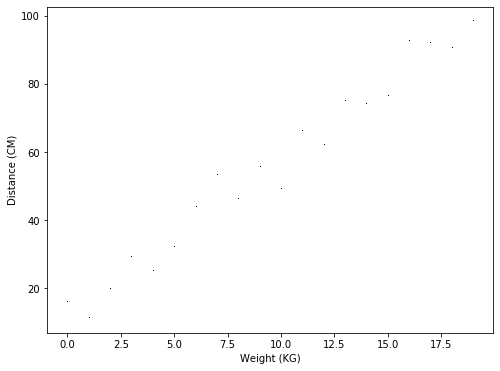

In [19]:
# create a plot

plt.plot(w, d, 'k,')

# set some properties for the plot
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

#show the plot
plt.show()

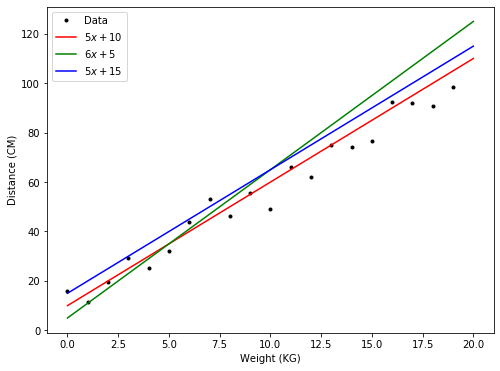

In [26]:
# plot w versus d with black dots
plt.plot(w, d, 'k.', label="Data")

# overlay some lines on the plot
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x + 5.0, 'g-', label=r"$6x + 5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# add a legend
plt.legend()

# add axis labels
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# show the plot
plt.show()

In [37]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   631.27
Cost with m =  6.00 and c =  5.00:  2643.32
Cost with m =  5.00 and c = 15.00:  1544.85


In [38]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.571556 and c is 12.002355.


In [39]:
np.polyfit(w, d, 1)

array([ 4.57155643, 12.00235509])

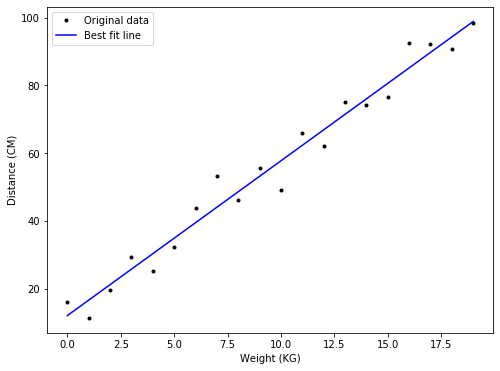

In [40]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

In [41]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  4.57 and c = 12.00:   423.68


In [ ]:
##Summary
In this notebook we:

Investigated the data.
Picked a model.
Picked a cost function.
Estimated the model parameter values that minimised our cost function.
Advanced
In the following sections we cover some of the more advanced concepts involved in fitting the line.

Simulating data
Earlier in the notebook we glossed over something important: we didn't actually do the weighing and measuring - we faked the data. A better term for this is simulation, which is an important tool in research, especially when testing methods such as simple linear regression.

We ran the following two commands to do this:

w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)
The first command creates a numpy array containing all values between 1.0 and 21.0 (including 1.0 but not including 21.0) in steps of 1.0.

In [42]:
 np.arange(0.0, 21.0, 1.0)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [43]:
5.0 * w + 10.0

array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
        65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.])

In [44]:
np.random.normal(0.0, 5.0, w.size)

array([ -5.8295461 ,  -1.59207336,  12.93685533,   3.72442063,
        -3.00627603,  -0.56518872,  10.26938331,   1.37387216,
        -1.66847184,   4.0865072 ,  -0.86280543,   5.70516626,
        -0.95307749,   4.35278777,   2.76450154,  -3.39815273,
        -3.75811763,   0.6188719 , -14.27825574,  -4.42056991])

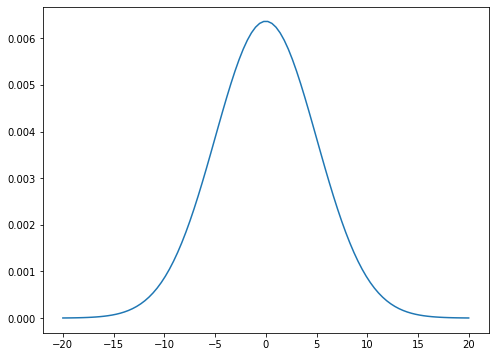

In [45]:
# Plot the normal distrution.
normpdf = lambda mu, s, x: (1.0 / (2.0 * np.pi * s**2)) * np.exp(-((x - mu)**2)/(2 * s**2))

x = np.linspace(-20.0, 20.0, 100)
y = normpdf(0.0, 5.0, x)
plt.plot(x, y)

plt.show()

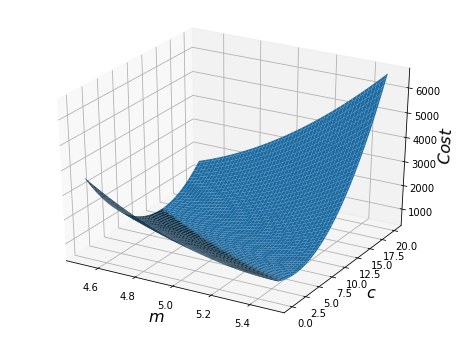

In [46]:
# This code is a little bit involved - don't worry about it.
# Just look at the plot below.

from mpl_toolkits.mplot3d import Axes3D

# Ask pyplot a 3D set of axes.
ax = plt.figure().gca(projection='3d')

# Make data.
mvals = np.linspace(4.5, 5.5, 100)
cvals = np.linspace(0.0, 20.0, 100)

# Fill the grid.
mvals, cvals = np.meshgrid(mvals, cvals)

# Flatten the meshes for convenience.
mflat = np.ravel(mvals)
cflat = np.ravel(cvals)

# Calculate the cost of each point on the grid.
C = [np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)]) for m, c in zip(mflat, cflat)]
C = np.array(C).reshape(mvals.shape)

# Plot the surface.
surf = ax.plot_surface(mvals, cvals, C)

# Set the axis labels.
ax.set_xlabel('$m$', fontsize=16)
ax.set_ylabel('$c$', fontsize=16)
ax.set_zlabel('$Cost$', fontsize=16)

# Show the plot.
plt.show()

In [ ]:
##Coefficient of determination
Earlier we used a cost function to determine the best line to fit the data. Usually the data do not perfectly fit on the best fit line, and so the cost is greater than 0. A quantity closely related to the cost is the coefficient of determination, also known as the R-squared value. The purpose of the R-squared value is to measure how much of the variance in y is determined by x.

For instance, in our example the main thing that affects the distance the spring is hanging down is the weight on the end. It's not the only thing that affects it though. The room temperature and density of the air at the time of measurment probably affect it a little. The age of the spring, and how many times it has been stretched previously probably also have a small affect. There are probably lots of unknown factors affecting the measurment.

The R-squared value estimates how much of the changes in the y value is due to the changes in the x value compared to all of the other factors affecting the y value. It is calculated as follows:

R2=1−∑i(yi−mxi−c)2∑i(yi−y¯)2
Note that sometimes the Pearson correlation coefficient is used instead of the R-squared value. You can just square the Pearson coefficient to get the R-squred value.b

In [47]:
# Calculate the R-squared value for our data set.
rsq = 1.0 - (np.sum((d - m * w - c)**2)/np.sum((d - d_avg)**2))

print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.9704


In [48]:
# The same value using numpy.
np.corrcoef(w, d)[0][1]**2

0.9704164537241994

In [ ]:
##The minimisation calculations
Earlier we used the following calculation to calculate m and c for the line of best fit. The code was:

w_zero = w - np.mean(w)
d_zero = d - np.mean(d)

m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
c = np.mean(d) - m * np.mean(w)
In mathematical notation we write this as:

m=∑i(xi−x¯)(yi−y¯)∑i(xi−x¯)2andc=y¯−mx¯
where x¯ is the mean of x and y¯ that of y.

Where did these equations come from? They were derived using calculus. We'll give a brief overview of it here, but feel free to gloss over this section if it's not for you. If you can understand the first part, where we calculate the partial derivatives, then great!

The calculations look complex, but if you know basic differentiation, including the chain rule, you can easily derive them. First, we differentiate the cost function with respect to m while treating c as a constant, called a partial derivative. We write this as ∂m∂Cost, using δ as opposed to d to signify that we are treating the other variable as a constant. We then do the same with respect to c while treating m as a constant. We set both equal to zero, and then solve them as two simultaneous equations in two variables.

Calculate the partial derivatives
Cost(m,c)∂Cost∂m∂Cost∂c=∑i(yi−mxi−c)2=∑2(yi−mxi−c)(−xi)=−2∑xi(yi−mxi−c)=∑2(yi−mxi−c)(−1)=−2∑(yi−mxi−c)(1)(2)(3)(4)(5)
Set to zero
∂Cost∂m=0⇒−2∑xi(yi−mxi−c)=0⇒∑(xiyi−mxixi−xic)=0⇒∑xiyi−∑imxixi−∑xic=0⇒m∑xixi=∑xiyi−c∑xi⇒m=∑xiyi−c∑xi∑xixi∂Cost∂c=0⇒−2∑(yi−mxi−c)=0⇒∑yi−∑imxi−∑c=0⇒∑yi−m∑ixi=c∑1⇒c=∑yi−m∑xi∑1⇒c=∑yi∑1−m∑xi∑1⇒c=y¯−mx¯(6)(7)(8)(9)(10)(11)(12)(13)(14)(15)(16)(17)(18)
Solve the simultaneous equations
Here we let n be the length of x, which is also the length of y.

m=∑ixiyi−c∑ixi∑ixixi⇒m=∑xiyi−(y¯−mx¯)∑xi∑xixi⇒m∑xixi=∑xiyi−y¯∑xi+mx¯∑xi⇒m∑xixi−mx¯∑xi=∑xiyi−y¯∑xi⇒m=∑xiyi−y¯∑xi∑xixi−x¯∑xi⇒m=∑(xiyi)−ny¯x¯∑(xixi)−nx¯x¯⇒m=∑(xiyi)−ny¯x¯−ny¯x¯+ny¯x¯∑(xixi)−nx¯x¯−nx¯x¯+nx¯x¯⇒m=∑(xiyi)−∑yix¯−∑y¯xi+ny¯x¯∑(xixi)−∑xix¯−∑x¯xi+nx¯x¯⇒m=∑i(xi−x¯)(yi−y¯)∑i(xi−x¯)2(19)(20)(21)(22)(23)(24)(25)(26)(27)
